## E-learning project

This project was focused on EDA only, without any statistical hypotheses tested. Four datasets were given, with several questions to be answered based on the EDA.

In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import scipy.stats as ss
from urllib.parse import urlencode 
import matplotlib.pyplot as plt

In [2]:
# assessments.csv download
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ' 
# obtain the url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
# create a dataframe 
download_response = requests.get(download_url) 
assessments = pd.read_csv(download_url, sep=',') 

**Assessments**
Includes the information on the test grades. Typically, each subject in a semester includes a series of graded tests followed by a final examination test (exam).

*code_module* — subject ID.

*code_presentation* — semester ID.

*id_assessment* — test ID.

*assessment_type* — test type: professor assessment (TMA), computerized assessment (СМА), course exam (Exam).

*date* — information about the final date of the test, calculated as the number of days from the start of the semester. The start date of the semester has the number 0 (zero)

*weight* — the weight of the test in % of the course grade. Usually exams are considered separately and have a weight of 100%; the sum of all other grades is 100%.

In [3]:
# courses.csv download
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/jmJxR8yhwCXlaw' 
# obtain the url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
# create a dataframe 
download_response = requests.get(download_url) 
courses = pd.read_csv(download_url, sep=',') 

**Courses**
List of the subjects by semester

*code_module* — subject ID.

*code_presentation* — semester ID.

*module_presentation_length* — semester length.

In [4]:
# studentAssessment.csv download
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/DYd4M5b_8RETsA' 
# obtain the url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
# create a dataframe 
download_response = requests.get(download_url) 
st_assessment = pd.read_csv(download_url, sep=',') 

**st_assessment**
Student test results. If a student does not submit a work for evaluation, the result is not recorded in the table.

*id_assessment* — test ID.

*id_student* — student ID.

*date_submitted* — the date the student took the test, measured as the number of days from the start of the semester..

*is_banked* — the fact that a test from the previous semester was re-credited (sometimes courses are re-credited for students returning from academic leave).

*score* — the student's score on the test. The range is from 0 to 100. A score below 40 indicates a failure.

In [5]:
# studentRegistration.csv download
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/lqHnH8NOZ458iw' 
# obtain the url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
# create a dataframe 
download_response = requests.get(download_url) 
registration = pd.read_csv(download_url, sep=',') 

In [6]:
registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


**registration**
Information about the time a student registered for a course in a semester.

*code_module* — subject ID.

*code_presentation* — semester ID.

*id_student* — student ID.

*date_registration* — student registration date. This is the number of days measured from the start of the semester (e.g. a negative value of -30 means that the student registered for the course 30 days before it started).

*date_unregistration* — the date the student unregistered from the course. For those students who have completed the course, this field is left empty.

In [7]:
# courses & assessments left join by code_module, code_presentation
courses_and_assess= pd.merge(assessments, courses, how='left', on=['code_module','code_presentation'])

In [8]:
courses_and_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 206 non-null    object 
 1   code_presentation           206 non-null    object 
 2   id_assessment               206 non-null    int64  
 3   assessment_type             206 non-null    object 
 4   date                        195 non-null    float64
 5   weight                      206 non-null    float64
 6   module_presentation_length  206 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 12.9+ KB


In [9]:
# courses_and_assess & st_assessment left join by id_assessment  
stud_courses_info= pd.merge(st_assessment, courses_and_assess, how='left', on=['id_assessment'])

In [10]:
stud_courses_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_assessment               173912 non-null  int64  
 1   id_student                  173912 non-null  int64  
 2   date_submitted              173912 non-null  int64  
 3   is_banked                   173912 non-null  int64  
 4   score                       173739 non-null  float64
 5   code_module                 173912 non-null  object 
 6   code_presentation           173912 non-null  object 
 7   assessment_type             173912 non-null  object 
 8   date                        171047 non-null  float64
 9   weight                      173912 non-null  float64
 10  module_presentation_length  173912 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 15.9+ MB


In [11]:
#Checking if there are any NaN in the exam scores
stud_courses_info[(stud_courses_info['assessment_type'] == 'Exam') & (stud_courses_info['score'].isnull())]
#There are no missing values

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length


**Question 1** How many students successfully passed only one course? (Successful passing is passing the course on the exam).

To solve the problem, conduct a preliminary data exploration and formulate what should be considered a course. You can justify your choice using the facts of passing exams, student distribution and a unique course identifier.

*Let's assume that a course is a unique combination of a subject (code_module) and a semester (code_presentation) for which the final assessment was carried out using an exam (assessment_type == 'Exam'), since it is specified in the task that successful completion is a credit for the course on an exam. Since for each unique subject there could be several exams in different semesters (code_presentation), let's check whether there were students who took the exam on the same subject in different semesters*

In [12]:
#to test this statement, let's check how many unique code_presentation are there
#for each combination of a student who passed the exam with more than 40 points and a code_module
unique_comb = stud_courses_info.query("score >= 40 & assessment_type == 'Exam'")\
.groupby(['id_student', 'code_module'], as_index = False)\
.code_presentation.nunique()
unique_comb.query("code_presentation > 1")

,id_student,code_module,code_presentation
1341,540758,DDD,2
2232,593903,DDD,2
2479,605118,DDD,2


*There are 3 students. Let's take a closer look*

In [13]:
stud_courses_info.query("(id_student == 540758 | id_student == 593903 | id_student == 605118) & (assessment_type == 'Exam')")\
.head(10).sort_values('id_student')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
69983,25340,540758,229,0,40.0,DDD,2013B,Exam,240.0,100.0,240
87573,25361,540758,234,0,60.0,DDD,2014B,Exam,241.0,100.0,241
82731,25354,593903,241,0,49.0,DDD,2013J,Exam,261.0,100.0,261
95711,25368,593903,243,0,44.0,DDD,2014J,Exam,NaN,100.0,262
82844,25354,605118,237,0,42.0,DDD,2013J,Exam,261.0,100.0,261
95749,25368,605118,243,0,64.0,DDD,2014J,Exam,NaN,100.0,262


In [14]:
registration.query('id_student == 540758 | id_student == 593903 | id_student == 605118').head(50).sort_values('id_student')

,code_module,code_presentation,id_student,date_registration,date_unregistration
13857,DDD,2013B,540758,-74.0,NaN
16693,DDD,2014B,540758,-25.0,NaN
15768,DDD,2013J,593903,-98.0,NaN
18191,DDD,2014J,593903,13.0,NaN
15985,DDD,2013J,605118,-31.0,NaN
18253,DDD,2014J,605118,-3.0,NaN


*We can see that the students registered separately for each semester, and there was no unregistration. Let's take a closer look at the DDD course. Were there any students who mastered it in one semester?*

In [15]:
stud_courses_info.query("code_module == 'DDD' & assessment_type == 'Exam'")\
.groupby('id_student', as_index = False).agg({'id_assessment':'count'}).query('id_assessment== 1')

,id_student,id_assessment
0,24213,1
1,28046,1
2,29411,1
3,31173,1
4,33796,1
...,...,...
3035,2693243,1
3036,2694886,1
3037,2694933,1
3038,2695608,1


*There are 3036 such students. Therefore, passing the course in 2 semesters was not a common practice. It could be a result of a reassessment in case of a low but acceptable grade, or an another course. Given the lack of information about the learning process, let’s assume that we can consider a unique combination of code_module and code_presentation to be a course*

In [16]:
#Filtering the records with the grade type "exam" and a score of 40 or higher to keep only those who passed the test
exams = stud_courses_info.query("score >= 40 & assessment_type == 'Exam'")
#Grouping by id_student and counting the number of unique subjects and semesters for each student
#Accordingly, a student has passed only one course if he has a unique code_module = 1
#and a unique code_presentation = 1.
exams.groupby('id_student', as_index = False).agg({'code_module': 'nunique', 'code_presentation': 'nunique'})\
.query('code_module == 1 & code_presentation == 1').id_student.value_counts()

634878     1
647937     1
554484     1
2087698    1
631569     1
          ..
642443     1
560243     1
652680     1
646071     1
573440     1
Name: id_student, Length: 3802, dtype: int64

**Answer to the question 1**: 3802 students successfully passed only one course

**Question 2** Indentify the hardest and the easiest exam: Find the courses and exams within a course that have the lowest and highest completion rates.
*completion rate = number of successful exams / number of total attempts to pass the exam

In [17]:
#I will select exams, group by code_module, code_presentation and id_assessment (to identify the exam within the course)
#Next I will calculate 2 new variables: the total number of exams and the number of passed exams (40 points and above)
exams_stat = stud_courses_info.query("assessment_type == 'Exam'")\
.groupby(['code_module', 'code_presentation', 'id_assessment'], as_index = False)\
.agg(total_exams =('date_submitted','count'), passed_exams = ('score', lambda x: (x >= 40).sum()))


In [18]:
#Creating new pass_rate variable
exams_stat['pass_rate'] = exams_stat.passed_exams / exams_stat.total_exams

In [19]:
exams_stat.sort_values('pass_rate', ascending = True)

,code_module,code_presentation,id_assessment,total_exams,passed_exams,pass_rate
2,DDD,2013B,25340,602,504.0,0.837209
1,CCC,2014J,24299,1168,1019.0,0.872432
5,DDD,2014J,25368,950,842.0,0.886316
0,CCC,2014B,24290,747,664.0,0.888889
3,DDD,2013J,25354,968,878.0,0.907025
4,DDD,2014B,25361,524,485.0,0.925573


**Answer to the question 2** The course with the lowest completion rate is DDD in semester 2013B (exam 25340), the course with the highest completion rate is DDD in semester 2014B (exam 25361)

**Question 3** For each subject, calculate the average time for passing exams (by passing we mean the last successful completion of the exam by a student).

In [20]:
#The assignment refers to the subject, not the course.
#We will assume that we are talking about the variable code_module, so we will not take the semester into account
#I will use filtered exams data (exams passed with more than 40 points)
#Let's check which measure of central tendency we can use: the mean or the median. Let's look at the distribution
#I'll group by subject and student to find the largest date_submitted for each student, according to the task
exams_mean = exams.groupby(['code_module', 'id_student'], as_index = False).agg(last_submission_date=('date_submitted', 'max'))
#Deleting id_student for convenience
exams_mean = exams_mean.drop(columns = 'id_student')
exams_mean.code_module.unique()

array(['CCC', 'DDD'], dtype=object)

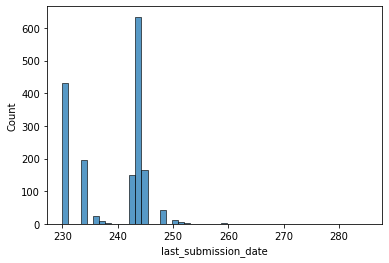

In [21]:
#Let's look at the distribution for CCC
sns.histplot(data = exams_mean.query("code_module =='CCC'").last_submission_date, bins = 50)

In [22]:
#The graph shows that the distribution differs from the normal one
#However, here and below I will perform a formal check for normal distribution
ss.normaltest(exams_mean.query("code_module =='CCC'").last_submission_date)

NormaltestResult(statistic=9.683275690036737, pvalue=0.00789411412219717)

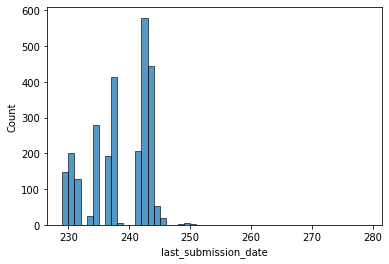

In [23]:
sns.histplot(data = exams_mean.query("code_module =='DDD'").last_submission_date, bins = 50)

In [24]:
ss.normaltest(exams_mean.query("code_module =='DDD'").last_submission_date)

NormaltestResult(statistic=46.66942887890582, pvalue=7.342809855565892e-11)

In [25]:
#The data don't follow normal distribution, which is expected for this type of data (usually the exam date is set up)
#So let's group by code_module, calculate the median, rather than mean and sd

median_time = exams_mean.groupby('code_module', as_index=False)\
.agg(median_days=('last_submission_date', 'median'))
median_time ['median_days'] =  median_time.median_days.round(2)
median_time

,code_module,median_days
0,CCC,244
1,DDD,237


**Answer to the question 3** The median time of the CCC exam completion is 244 days, and for the DDD subject it is 237 days.

**Question 4** Identify the most popular subjects (TOP-3) by the number of registrations, and the subjects with the highest withdrawal (TOP-3)

In [26]:
#I will use the registration dataset
#Since there are no additional conditions, I will group by code_module only (we take into account subjects, not courses)
#The same students could register for the same subject repeatedly in different semesters
#The task does not specify that the popularity indicator should be calculated based on unique id only
#Also, I assume that the same students registering for a subject in different semesters do not alter popularity rates
registrations_stat = registration.groupby('code_module', as_index = False)\
.agg(registrations = ('date_registration','count'), unregistrations = ('date_unregistration','count')).sort_values('registrations', ascending = False)
registrations_stat

,code_module,registrations,unregistrations
1,BBB,7900,2377
5,FFF,7751,2380
3,DDD,6257,2235
2,CCC,4426,1947
4,EEE,2932,718
6,GGG,2534,289
0,AAA,748,126


In [27]:
top_registrations = registrations_stat.sort_values('registrations', ascending=False).head(3)
top_unregistrations = registrations_stat.sort_values('unregistrations', ascending=False).head(3)

In [31]:
output = f"""Top-3 subjects by registrations:
{top_registrations[['code_module', 'registrations']].to_string(index=False, header=False, justify='left', line_width=None)}

Top-3 subjects by withdrawal:
{top_unregistrations[['code_module', 'unregistrations']].to_string(index=False, header=False, justify='left', line_width=None)}"""


**Answer to the question 4**

In [32]:
print(output)

Top-3 subjects by registrations:
 BBB  7900
 FFF  7751
 DDD  6257

Top-3 subjects by withdrawal:
 FFF  2380
 BBB  2377
 DDD  2235


**Question 5** Using pandas, identify the semester with the lowest course completion rates and the longest average course completion times from the beginning of 2013 to the end of 2014.

From step 2: completion rate = number of exams passed / number of total exam attempts

In [30]:
#Let's see how to select the necessary dates. Let's look at the data on the semesters
stud_courses_info.code_presentation.unique()
#Probably, the data contains records for the required dates only

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [31]:
#We are interested in semesters, so I don't not group by code_module
#To evaluate completion, I will select exams
semester_stat = stud_courses_info.query("assessment_type == 'Exam'").groupby(['code_presentation'], as_index = False)\
.agg(total_exams =('date_submitted','count'), passed_exams = ('score', lambda x: (x >= 40).sum()))
semester_stat['pass_rate'] = semester_stat.passed_exams / semester_stat.total_exams
semester_stat['pass_rate']  = semester_stat.pass_rate.round(2)
#Let's identify the semester with the lowest completion rate
semester_stat.sort_values('pass_rate')

,code_presentation,total_exams,passed_exams,pass_rate
0,2013B,602,504.0,0.84
3,2014J,2118,1861.0,0.88
2,2014B,1271,1149.0,0.90
1,2013J,968,878.0,0.91


In [32]:
#Let's identify the semester with the longest course submission time
#I will use the filtered exams data,
#group by semester, subject, and student to find the largest date_submitted for each student, according to the task
semester_mean = exams.groupby(['code_presentation', 'code_module', 'id_student'], as_index = False)\
.agg(last_submission_date=('date_submitted', 'max'))
#Removing the id_student column for convenience
semester_mean = semester_mean.drop(columns = 'id_student')
semester_mean.code_presentation.unique()

array(['2013B', '2013J', '2014B', '2014J'], dtype=object)

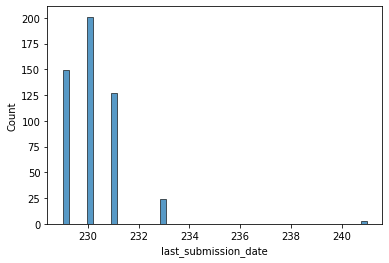

In [33]:
#Let's check what measure of central tendency we will use: mean or median. Let's look at the distribution
#the distribution for 2013B
sns.histplot(data = semester_mean.query("code_presentation =='2013B'").last_submission_date, bins = 50)

In [34]:
ss.normaltest(semester_mean.query("code_presentation =='2013B'").last_submission_date)

NormaltestResult(statistic=460.8453171249272, pvalue=8.486153455039891e-101)

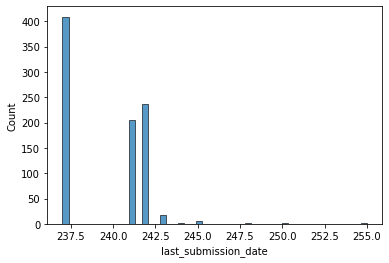

In [35]:
#Repeat for the remaining semesters
sns.histplot(data = semester_mean.query("code_presentation =='2013J'").last_submission_date, bins = 50)

In [36]:
ss.normaltest(semester_mean.query("code_presentation =='2013J'").last_submission_date)

NormaltestResult(statistic=25.477741443078415, pvalue=2.9348015512399133e-06)

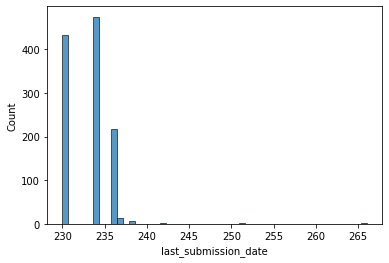

In [37]:
sns.histplot(data = semester_mean.query("code_presentation =='2014B'").last_submission_date, bins = 50)

In [38]:
ss.normaltest(semester_mean.query("code_presentation =='2014B'").last_submission_date)

NormaltestResult(statistic=598.1212122599628, pvalue=1.3171310960729486e-130)

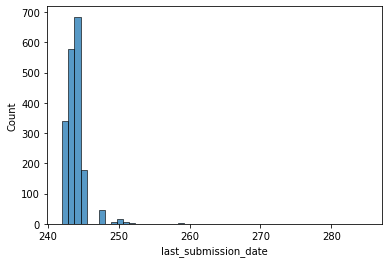

In [39]:
sns.histplot(data = semester_mean.query("code_presentation =='2014J'").last_submission_date, bins = 50)

In [40]:
ss.normaltest(semester_mean.query("code_presentation =='2014J'").last_submission_date)

NormaltestResult(statistic=2873.9359408601913, pvalue=0.0)

In [41]:
#The data don't follow normal distribution, so I will group by code_presentation,and calculate median
semester_time = semester_mean.groupby('code_presentation', as_index=False)\
.agg(median_days=('last_submission_date', 'median'))
semester_time ['median_days'] =  semester_time.median_days.round(2)
semester_time.sort_values('median_days')

,code_presentation,median_days
0,2013B,230
2,2014B,234
1,2013J,241
3,2014J,244


**Answer to the question 5** The semester with the lowest completion rate (0.84) and with the longest completion times (median = 230) - 2013B